## <font color = "#CC3D3D">Case #1: GrabCut</font>

<hr>

### Step #1: Concept
<hr>

- 그랩컷(GrabCut)
    - 그래프 컷(graph cut) 기반의 영역 분할 알고리즘이다.
    - 영상의 픽셀을 그래프 정점으로 간주하고, 픽셀들을 두 개의 그룹으로 나누는<br>
    최적의 컷(Max Flow Minimum Cut)을 찾는 방식이다.

<hr>

- 그랩컷 영상 분할 동작 방식
    - 사각형 지정 자동 분할 or 사용자가 지정한 전경/배경 정보를 활용하여 영상 분할 or both
    - <img src="images/markdown/grabcut.png" width="600">



<hr>

### Step #2: OpenCV function
<hr>

> `그랩컷 함수`

$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}grabCut}(img, mask, rect, bgdModel, fgdModel, iterCount, mode)\rightarrow mask, bgdModel, fgdModel}$$
- img: image. 입력 영상
- mask: 입출력 마스크
- rect: rectangle. ROI 영역
- bgdModel: background model. 임시 배경 모델 행렬
- fgdModel: foreground model. 임시 전경 모델 행렬
- iterCount: iteration count. 결과 생성을 위한 반복 횟수
- mode: cv2.GC_로 시작하는 모드 상수
- `참고사항:`
    - img: 8 bit 3 channel 영상을 입력으로 사용한다.
    - mask: 이전에 공부했던 마스크 연산시에 사용하는 마스크 영상(0또는 255의 이진 영상)과는 다르게<br>
    0,1,2,3 으로 구성되어 있다.
        - 0: cv2.GC_BGD. 확실한 배경
        - 1: cv2.GC_FGD. 확실한 전경(객체)
        - 2: cv2.GC_PR_BGD. 아마도 배경
        - 3: cv2.GC_PR_FGD. 아마도 전경(객체)
    - rect: cv2.GC_INIT_WITH_RECT 모드에서만 사용된다.
    - bgdModel: 같은 영상 처리 시에는 변경을 금한다.
    - fgdModel: 같은 영상 처리 시에는 변경을 금한다.
    - mode: 보통 cv2.GC_INIT_WITH_RECT 모드로 초기화를 진행하고, cv2.GC_INIT_WITH_MASK 모드로 업데이트를 한다.

In [ ]:
import cv2
help(cv2.grabCut)

<hr>

### Step #3: Implementation example
<hr>

In [130]:
# ROI 그랩컷 영상 분할 예제
import cv2
import matplotlib.pyplot as plt
import numpy as np

source = cv2.imread("images/nemo.jpg")

ROI = cv2.selectROI(source)
mask = np.zeros(source.shape[:2], np.uint8)

cv2.grabCut(source, mask, ROI, None, None, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask == 0) | (mask == 2), 0, 1).astype("uint8")
destination = source * mask2[:, :, np.newaxis]

mask *= 64

cv2.imshow("GrabCut", destination)
cv2.imshow("mask", mask)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


-1

In [11]:
# 마우스를 활용한 그랩컷 영상 분할 예제
import cv2
import matplotlib.pyplot as plt
import numpy as np

source = cv2.imread("images/pose1.jpg")

if source is None:
    print("Image load failed!")

mask = np.zeros(source.shape[:2], np.uint8)
background_model = np.zeros((1, 65), np.float64)
foreground_model = np.zeros((1, 65), np.float64)

ROI = cv2.selectROI(source)

cv2.grabCut(source, mask, ROI, background_model, foreground_model, 1, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask == 0) | (mask == 2), 0, 1).astype("uint8")
destination = source * mask2[:, :, np.newaxis]

cv2.imshow("GrabCut", destination)


def on_mouse(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(destination, (x, y), 3, (255, 0, 0), -1)
        cv2.circle(mask, (x, y), 3, cv2.GC_FGD, -1)
        cv2.imshow("GrabCut", destination)
    elif event == cv2.EVENT_RBUTTONDOWN:
        cv2.circle(destination, (x, y), 3, (0, 0, 255), -1)
        cv2.circle(mask, (x, y), 3, cv2.GC_BGD, -1)
        cv2.imshow("GrabCut", destination)
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.circle(destination, (x, y), 3, (255, 0, 0), -1)
            cv2.circle(mask, (x, y), 3, cv2.GC_FGD, -1)
            cv2.imshow("GrabCut", destination)
        elif flags & cv2.EVENT_FLAG_RBUTTON:
            cv2.circle(destination, (x, y), 3, (0, 0, 255), -1)
            cv2.circle(mask, (x, y), 3, cv2.GC_BGD, -1)
            cv2.imshow("GrabCut", destination)


cv2.setMouseCallback("GrabCut", on_mouse)

while(1):
    key = cv2.waitKey()
    if key is 13:
        cv2.grabCut(source, mask, ROI, background_model, foreground_model, 1, cv2.GC_INIT_WITH_MASK)
        mask2 = np.where((mask == 0) | (mask == 2), 0, 1).astype("uint8")
        destination = source * mask2[:, :, np.newaxis]
        cv2.imshow("GrabCut", destination)
    elif key is 27:
        break

cv2.destroyAllWindows()
cv2.waitKey(1)

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


-1

## <font color = "#CC3D3D">Case #2: Moments based object detection</font>

<hr>

### Step #1: Concept
<hr>

- 모멘트(Moments)
    - 영상의 형태(모양 정보)를 표현하는 일련의 실수값들의 집합이다.
        - 일종의 어떤 특징 벡터를 추출하는 방법
    - 특정 함수 집합과의 상관 관계(correlation) 형태로 계산된다.
    - `Geometric moments`, `Central moments`, `Normalized central moments`, Legendre moments,<br>
    Complex moments, Zernike moments, ART(Angular Radial Transform), etc.
        - `강조 표시`한 모멘트 방법이 OpenCV에서 지원 되는 방법이다.

$$\text{(e.g.) Geometric moments:}\quad m_{pq}=\sum_{y=0}^{N-1}\sum_{x=0}^{M-1}x^p y^q f(x,y)$$

- Hu의 7개 불변 모멘트(Hu's seven invariant moments)
    - 3차 이하의 정규화된 중심 모멘트를 조합하여 만든 7개의 모멘트 값
    - 영상의 `크기, 회전, 이동, 대칭 변환`에 불변(모멘트 값 유지)

<hr>

### Step #2: OpenCV function
<hr>

> `모양 비교 함수`

$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}matchShapes}(contour1, contour2, method, parameter)\rightarrow retval}$$
- contour1: 첫 번째 외곽선 또는 그레이스케일 영상
- contour2: 두 번째 외곽선 또는 그레이스케일 영상
- method: 비교 방법 지정
- parameter: 사용되지 않음. 0 지정
- retval: return value. 두 외곽선 또는 그레이스케일 영상 사이의 거리(distance)
- `참고사항:`
    - method: cv2.CONTOURS_MATCH_I1, cv2.CONTOURS_MATCH_I2, cv2.CONTOURS_MATCH_I3 중 하나를 사용한다.
    - Hu의 불변모멘트를 이용하여 두 외곽선 또는 영상의 모양을 비교한다.
        - 크기, 회전, 이동, 대칭 변환에 강인하다.
        - 반면에 투시 변환, 전단 변환, 리매핑 기법을 이용한 모양의 변화 등에 취약하다.
    - 모양 비교 메서드 함수
        - <img src="images/markdown/contours_match_methods.png" width="500">

In [ ]:
import cv2
help(cv2.matchShapes)

<hr>

### Step #3: Implementation example
<hr>

In [30]:
# 모멘트 기반 객체 검출 예제
import cv2
import matplotlib.pyplot as plt

obj = cv2.imread("images/spades.png", cv2.IMREAD_GRAYSCALE)
source = cv2.imread("images/symbols.png", cv2.IMREAD_GRAYSCALE)

if obj is None or source is None:
    print("Image load failed!")
else:
    print("Image load succeed!")

Image load succeed!


In [31]:
# 기준 객체의 외곽선 검출
_, object_binarization = cv2.threshold(obj, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
object_contour, _ = cv2.findContours(object_binarization, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
object_points = object_contour[0]

# 입력 영상의 모든 객체의 외곽선 검출
_, source_binarization = cv2.threshold(source, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
source_contours, _ = cv2.findContours(source_binarization, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [32]:
obj = cv2.cvtColor(obj, cv2.COLOR_GRAY2BGR)
destination = cv2.cvtColor(source, cv2.COLOR_GRAY2BGR)

# 기준 객체와 입력영상에서 검출된 객체의 모양 비교
for points in source_contours:
    rectangle = cv2.boundingRect(points)
    origin = (rectangle[0], rectangle[1] - 3)
    
    distance = cv2.matchShapes(object_points, points, cv2.CONTOURS_MATCH_I3, 0)
    
    cv2.putText(
        destination, str(round(distance, 4)), origin, cv2.FONT_HERSHEY_SIMPLEX,
        0.6, (255, 0, 0), 1, cv2.LINE_AA
        )

    if distance < 0.1:
        cv2.rectangle(destination, rectangle, (0, 0, 255), 2)
    else:
        cv2.rectangle(destination, rectangle, (255, 0, 0), 1)

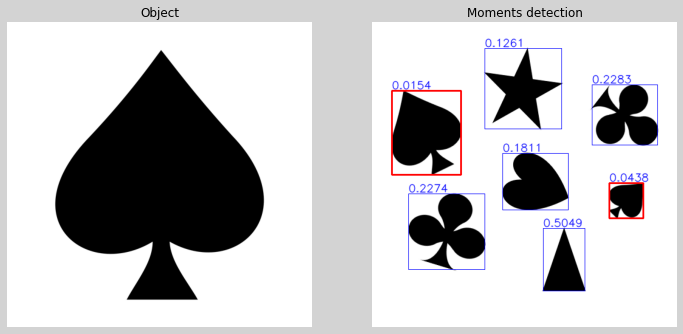

In [33]:
# pyplot으로 출력
plt.figure(figsize=(12, 6), facecolor="lightgray")

plt.subplot(121, title="Object").axis("off")
plt.imshow(obj[..., ::-1])

plt.subplot(122, title="Moments detection").axis("off")
plt.imshow(destination[..., ::-1])

plt.show()

In [ ]:
# OpenCV 가상 윈도우로 출력
cv2.imshow("Object", obj)
cv2.imshow("Moments detection", destination)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

## <font color = "#CC3D3D">Case #3: Template matching</font>

<hr>

### Step #1: Concept
<hr>

- 템플릿 매칭(Template matching)
    - 입력 영상에서 템플릿 영상과 일치하는 부분을 찾는 기법을 말한다.
    - 템플릿이란 찾을 대상이 되는 작은 영상을 의미한다.
        - 패치(patch)라고도 한다.
    - 템플릿 매칭은 작은 크기의 템플릿 영상을 입력 영상 전체 영역에 대해 이동하면서 가장 비슷한 위치를<br>
    수치적으로 찾아내는 방식이다.
    - <img src="images/markdown/template_matching1.png" width="400">
    - <img src="images/markdown/template_matching2.png" width="400">
    - 템플릿 영상을 입력 영상 전체 영역에 대해 스캔하여 템플릿 영상과 입력 영상 부분 영상과의<br>
    유사도(similarity) 또는 비유사도(dissimilarity)를 계산한다.
    - 유사도를 계산할 경우에는 템플릿 영상과 비슷한 부분 영상 위치에서 값이 크게 나타나고,<br>
    비유사도를 계산할 경우에는 템플릿 영상과 비슷한 부분에서 값이 작게 나타난다.
    - 위 두번째 영상에서 오른쪽은 입력 영상의 모든 위치에서 템플릿 영상과의 비유사도를 계산하고,<br>
    그 결과를 그레이스케일 영상 형태로 나타내었다.
    - 그러므로 비유사도 영상에서 가장 어두운 픽셀 위치가 템플릿 영상과 가장 유사한 부분이 된다.

<hr>

### Step #2: OpenCV function
<hr>

> `템플릿 매칭 함수`

$$\mathsf{{\color{RoyalBlue}cv2}{\color{Tan}matchTemplate}(image, templ, method, result, mask)\rightarrow result}$$
- image: 입력 영상
- templ: template. 템플릿 영상
- method: 비교 방법
- result: 비교 결과 행렬
- mask: 마스크 연산 시 사용할 마스크 행렬
- `참고사항:`
    - image: 8 bit or 32 bit float
    - templ: image보다 작거나 같은 크기, 같은 타입으로 지정한다.
    - result: image의 크기가 W x H 이고, templ의 크기가 w x h 이면 result 크기는 `(W-w+1) x (H-h+1)`
        - type=`numpy.ndarray`
        - dtype=`numpy.float32`
    - method: cv2.TM_으로 시작하는 `TemplateMatchModes` 열거형 상수 중 하나를 지정한다.
        - `아래 예시 영상의 수식에서 I(x,y)는 입력 영상, T(x,y)는 템플릿 영상, R(x,y)는 비교 결과 행렬이다.`
        - <img src="images/markdown/tamplate_matching_method1.png" width="600">
        - TM_SQDIFF: 제곱차(squared difference) 매칭 방법
        - TM_CCORR: (교차)상관관계([cross]correlation) 매칭 방법
        - <img src="images/markdown/tamplate_matching_method2.png" width="600">
        - TM_CCOEFF: 상관계수(correlation coefficient) 매칭 방법
        - 각각의 방법에 대해 영상의 밝기 차이 영향을 줄여주는 정규화(normalized) 수식이 추가된 방법도 제공된다.
            - 각각의 열거형 상수 이름의 맨 뒤에 _NORMED 가 추가로 붙은 형태
            - 0 과 1 사이의 실수, -1 에서 1 사이의 실수로 나타난다.
        - 이 중에서 정규화된 상관계수 매칭 방법이 좋은 결과를 제공하는 것으로 알려져 있다.<br>
        그러나 계산 수식이 가장 복잡하기 때문에 실제 동작 시 연산량이 많을 수 있다는 점을 고려해야 한다.

In [ ]:
import cv2
help(cv2.matchTemplate)

<hr>

### Step #3: Example
<hr>

<img src="images/markdown/template_matching_example1.png" width="650">

<img src="images/markdown/template_matching_example2.png" width="650">

<hr>

### Step #4: Implementation example
<hr>

In [23]:
# 템플릿 매칭 예제
import cv2
import matplotlib.pyplot as plt
import numpy as np

source = cv2.imread("images/circuit2.bmp", cv2.IMREAD_GRAYSCALE)
template = cv2.imread("images/crystal.bmp", cv2.IMREAD_GRAYSCALE)

if source is None or template is None:
    print("Image load failed!")
else:
    print("Image laod succeed!")

Image laod succeed!


In [24]:
# 입력 영상에 노이즈(평균 밝기 50증가, sigma=10의 가우시안 잡음)추가
noise = np.zeros(source.shape, np.int32)
cv2.randn(noise, 50, 10)
source_noise = cv2.add(source, noise, dtype=cv2.CV_8UC3)

In [25]:
# 템플릿 매칭
response = cv2.matchTemplate(source_noise, template, cv2.TM_CCOEFF_NORMED)
response_norm = cv2.normalize(response, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# 가장 높은 유사도 값과 위치 출력
_, max_value, _, max_loc = cv2.minMaxLoc(response)
print("max value:", max_value)
print("max value location:", max_loc)

max value: 0.9800027012825012
max value location: (568, 320)


In [26]:
# 비교 결과 행렬을 시각화 하기 위해 값을 0~255 사이로 정규화
response_norm = cv2.cvtColor(response_norm, cv2.COLOR_GRAY2BGR)
# 가장 높은 유사도 값의 위치 표시
response_norm = cv2.rectangle(response_norm, (max_loc[0] - 19, max_loc[1] - 19, 40, 40), (0, 0, 255), 2)

# 템플릿 매칭 결과 영상 생성
temp_height, temp_width = template.shape
destination = cv2.cvtColor(source_noise, cv2.COLOR_GRAY2BGR)
# 매칭 위치 표시
destination = cv2.rectangle(destination, (max_loc[0], max_loc[1], temp_width, temp_height), (0, 0, 255), 2)

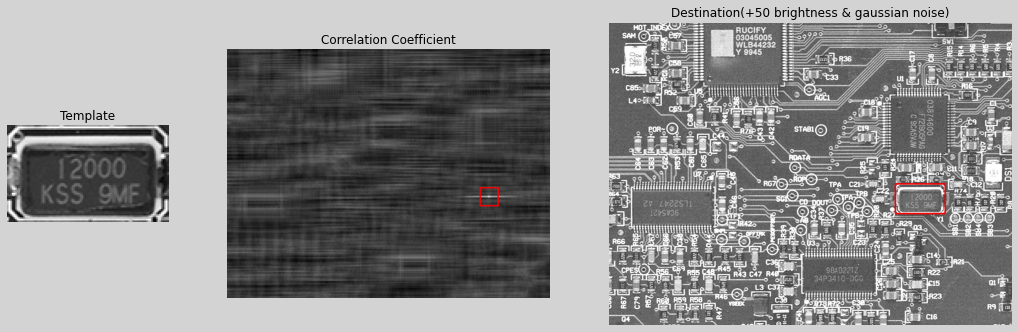

In [27]:
# pyplot으로 출력
plt.figure(figsize=(18, 6), facecolor="lightgray")
gridspec = plt.GridSpec(nrows=1, ncols=3, width_ratios=[1, 2, 2.5])

plt.subplot(gridspec[0], title="Template").axis("off")
plt.imshow(template, "gray")

plt.subplot(gridspec[1], title="Correlation Coefficient").axis("off")
plt.imshow(response_norm[..., ::-1])

plt.subplot(gridspec[2], title="Destination(+50 brightness & gaussian noise)").axis("off")
plt.imshow(destination[..., ::-1])

plt.show()

#### NOTE: 템플릿 매칭은 조명(밝기)의 변화나 잡음(noise)이 추가되어 영상이 지저분하여도 문제없이 동작하는 반면에,
#### 알고리즘 특성상 입력 영상이 회전되거나 크기가 변경되면 재대로 동작하지 않는다. 또한 찾고자 하는 템플릿 영상이
#### 다른 객체에 의해 가려져도 좋은 매칭 결과를 기대할 수 없다.

In [15]:
# OpenCV 가상 윈도우로 출력
cv2.imshow("Source", source)
cv2.imshow("Template", template)
cv2.imshow("Correlation Coefficient", response_norm)
cv2.imshow("Match Template", destination)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

<hr>

### Step #5: Application
<hr>

- 인쇄체 숫자 인식
    - 인식(Recognition)
        - 검출된 객체를 다른 범주로 분류하는 것을 의미한다.
        - 새로 입력 받은 영상을 가지고 있는 여러 개의 클래스와 각각 유사도를 계산하고,<br>
        그 중 가장 유사한 클래스를 선택하는 작업이다.
        - <img src="images/markdown/recognition.png" width="600">

In [28]:
# 간단한 숫자 인식 예제
import sys

import cv2
import matplotlib.pyplot as plt

source = cv2.imread("images/digits_print.bmp")

if source is None:
    print("Image load failed!")
    sys.exit()
else:
    print("Image load succeed!")

digits_image = []
for i in range(10):
    filename = f"images/digits/digit{i}.bmp"
    digits_image.append(cv2.imread(filename, cv2.IMREAD_GRAYSCALE))

    if digits_image[i] is None:
        print(f"Image load failed: digit{i}.bmp")
        sys.exit()
    else:
        print(f"Image load succeed: digit{i}.bmp")

Image load succeed!
Image load succeed: digit0.bmp
Image load succeed: digit1.bmp
Image load succeed: digit2.bmp
Image load succeed: digit3.bmp
Image load succeed: digit4.bmp
Image load succeed: digit5.bmp
Image load succeed: digit6.bmp
Image load succeed: digit7.bmp
Image load succeed: digit8.bmp
Image load succeed: digit9.bmp


In [ ]:
# 입력 영상의 숫자 레이블링
source_gray = cv2.cvtColor(source, cv2.COLOR_BGR2GRAY)
_, source_binarization = cv2.threshold(source_gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
count, _, stats, _ = cv2.connectedComponentsWithStats(source_binarization)

# 결과 영상 생성
destination = source.copy()

In [2]:
# 0~9 숫자 영상과 입력 영상의 숫자들과 템플릿 매칭
for i in range(1, count):
    x, y, w, h, a = stats[i]
    
    if a < 1000:
        continue
    
    max_index = -1
    max_ccoeff = -1
    
    labeled_object = cv2.resize(source_gray[y:y+h, x:x+w], (100, 150))
    
    for j in range(10):
        response = cv2.matchTemplate(labeled_object, digits_image[j], cv2.TM_CCOEFF_NORMED)
        
        if response[0, 0] > max_ccoeff:
            max_index = j
            max_ccoeff = response[0, 0]
    
    destination = cv2.rectangle(destination, (x, y, w, h), (0, 255, 255))
    destination = cv2.putText(
        destination, str(max_index), (x, y-4),
        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2, cv2.LINE_AA
        )

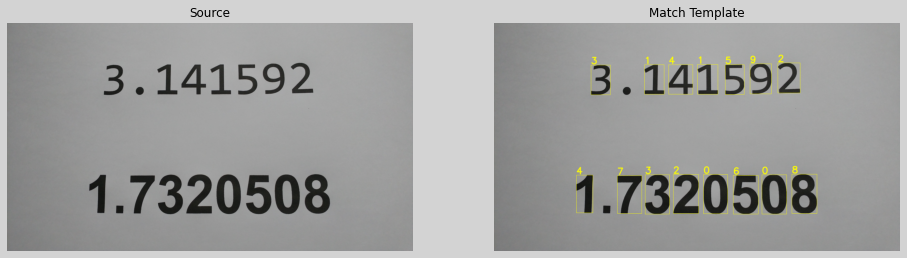

In [3]:
# pyplot으로 출력
plt.figure(figsize=(16, 6), facecolor="lightgray")

plt.subplot(121, title="Source").axis("off")
plt.imshow(source[..., ::-1])

plt.subplot(122, title="Match Template").axis("off")
plt.imshow(destination[..., ::-1])

plt.show()

#### NOTE: 입력 영상의 인쇄체 숫자 중 템플릿과 같은 폰트인 숫자는 잘 인식하는 반면에,
#### 템플릿과 다른 폰트는 8개 중 2개를 잘못 인식, 즉 인식률 75%라는 결과가 나타난다.

In [ ]:
# OpenCV 가상 윈도우로 출력
cv2.imshow("Source", source)
cv2.imshow("Match Template", destination)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

## <font color = "#CC3D3D">Case #4: Cascade classifier</font>

<hr>

### Step #1: Concept
<hr>

- Viola - Jones 얼굴 검출기
    - 2001년에 비올라(P. Viola)와 존스(M. Jones)가 발표한 부스팅(boosting) 기반의<br>
    캐스케이드 분류기(cascade classifier) 알고리즘을 기반으로 만들어졌다.
    - 기본적으로 다양한 객체를 검출할 수 있지만, 특히 얼굴 검출에 적용되어 속도와 정확도를 인정받은 기술이다.
    - 영상을 24 x 24 크기로 정규화한 후, 유사-하르 필터(Haar-like filter) 집합으로부터 특징 정보를<br>
    추출하여 얼굴 여부를 판별한다.
        - 유사-하르 필터란 흑백 사각형이 서로 붙어 있는 형태로 구성된 필터이며, 흰색 영역 픽셀 값은 모두 더하고,<br>
        검은색 영역 픽셀 값은 모두 빼서 하나의 특징 값을 얻을 수 있다. 사람의 정면 얼굴 형태가 전형적으로<br>
        밝은 영역(이마, 미간, 볼 등)과 어두운 영역(눈썹, 입술, 눈동자 등)이 정해져 있기 때문에 유사-하르<br>
        필터로 구한 특징 값은 얼굴을 판별하는 용도로 사용할 수 있다.
        - example: <img src="images/markdown/Haar-like_features1.png" width="500">
    - 유사-하르 필터의 문제점
        - 24 x 24 크기에서 다양한 크기의 유사-하르 필터를 대략 18만 개 생성할 수 있고, 픽셀 값의 합과 차를<br>
        계산하는 것이 복잡하지는 않지만 시간이 오래 걸린다는 점이 문제가 되었다.
    - 유사-하르 필터의 문제점 해결 방안
        - 에이다부스트(adaboost) 알고리즘과 적분 영상(integral image)을 이용하여 문제를 해결했다.
        - 에이다부스트 알고리즘은 수많은 유사-하르 필터 중에서 얼굴 검출에 효과적인 필터를 선별하는 역할을 수행한다.
        - 실제 논문에서는 약 6000개의 유사-하르 필터를 선별하였다.
        - example: <img src="images/markdown/Haar-like_features2.png" width="500">
    - 유사-하르 필터의 또다른 문제점
        - 에이다부스트 알고리즘에 의해 24 x 24 부분 영상에서 검사할 특징 개수가 약 6000개로 감소하였지만,<br>
        입력 영상 전체에서 부분 영상을 추출하여 검사해야 하기 때문에 여전히 연산량이 부담될 수 있다.
        - 더군다나 나타날 수 있는 얼굴 크기가 다양하기 때문에 보통 입력 영상의 크기를 줄여 가면서 전체 영역에 대한<br>
        검사를 다시 수행해야 한다.
    - 유사-하르 필터의 또다른 문제점 해결방안
        - 단체 사진이 아닌 이상 대부분의 영상에 얼굴이 한두 개 있을 뿐이고 나머지 대부분의 영역은 얼굴이 아니라는<br>
        점에 주목하였다.
        - 비올라-존스 알고리즘에서는 캐스케이드(cascade) 구조라는 새로운 방식을 도입하여 얼굴이 아닌 영역을<br>
        빠르게 걸러 내는 방식을 사용한다.
        - <img src="images/markdown/cascade_classifier.png" width="500">
    - 기존 방법과 비올라-존스 알고리즘의 차별점
        - 유사 하르(Haar-like) 특징을 사용
        - Adaboost에 기반한 강한 분류 성능
        - 캐스케이드(cascade) 방식을 통한 빠른 동작 속도
        - 기존 얼굴 검출 방법보다 약 15배 빠르게 동작
    - 캐스케이드 분류기 얼굴 검출 과정 시각화
        - [https://www.youtube.com/watch?v=hPCTwxF0qf4](https://www.youtube.com/watch?v=hPCTwxF0qf4)

<hr>

### Step #2: OpenCV function
<hr>

> `cv2.CascadeClassifier 객체 생성 및 학습 데이터 불러오기`

$$\mathsf{{\color{RoyalBlue}cv2.CascadeClassifier}(\quad\quad\quad\ \ )\rightarrow \text{<CascadeClassifier object>}}$$

$$\mathsf{{\color{RoyalBlue}cv2.CascadeClassifier}(filename)\rightarrow \text{<CascadeClassifier object>}}$$

$$\text{or}\quad\mathsf{{\color{RoyalBlue}cv2.CascadeClassifier}{\color{Tan}.load}(filename)\rightarrow retval}$$
- filename: XML 파일 경로와 이름
- retval: return value. 성공하면 True, 실패하면 False

<hr>

- 미리 학습된 XML 파일 다운로드
    - [https://github.com/opencv/opencv/tree/master/data/haarcascades](https://github.com/opencv/opencv/tree/master/data/haarcascades)
    - <img src="images/markdown/pre-trained_haarcascade.png" width="600">

<hr>

> `CascadeClassifier 멀티스케일 객체 검출 함수`

$$\mathsf{{\color{RoyalBlue}cv2.CascadeClassifier}{\color{Tan}.detectMultiScale}(image, scaleFactor, minNeighbors, flags, minSize, maxSize)\rightarrow result}$$
- image: 입력 영상
- scaleFactor: 영상 축소 비율
- minNeighbors: 검출 영역으로 선택하기 위한 최소 검출 횟수
- flags: 현재 사용되지 않음
- minSize: 최소 객체 크기
- maxSize: 최대 객체 크기
- result: 검출된 객체의 사각형 정보
- `참고사항:`
    - image: cv2.CV_8U 자료형 영상을 입력으로 한다.
    - scaleFactor: `기본값은 1.1`
    - minNeighbors: 얼마나 많은 이웃 사각형이 검출되어야 최종 검출 영역으로 설정할지를 지정한다.
        - `기본값은 3`
    - minSize: (w, h) 튜플 형태
    - maxSize: (w, h) 튜플 형태
    - result: 검출된 사각형의 모든 정보(x, y, w, h)를 담고 있다.
        - type=`numpy.ndarray`
        - shape=`(N, 4)`
        - dtype=`numpy.int32`

In [ ]:
import cv2
help(cv2.CascadeClassifier)

In [ ]:
import cv2
help(cv2.CascadeClassifier.detectMultiScale)

<hr>

### Step #3: Implementation example
<hr>

In [78]:
# Example a front face & eyes detection
import cv2
import matplotlib.pyplot as plt

source = cv2.imread("images/lenna.bmp")

if source is None:
    print("Image load failed!")

face_classifier = cv2.CascadeClassifier("supports/haarcascade_frontalface_alt2.xml")
eye_classifier = cv2.CascadeClassifier("supports/haarcascade_eye.xml")

if face_classifier.empty() or eye_classifier.empty():
    print("XML load failed!")

faces = face_classifier.detectMultiScale(source, scaleFactor=1.2, minSize=(100, 100))

destination = source.copy()

for (x1, y1, w1, h1) in faces:
    destination = cv2.rectangle(destination, (x1, y1, w1, h1), (255, 0, 255), 2)

    face_region = destination[y1:y1+h1 // 2, x1:x1+w1]
    eyes = eye_classifier.detectMultiScale(face_region)
    for (x2, y2, w2, h2) in eyes:
        center = (x2 + w2 // 2, y2 + h2 // 2)
        face_region = cv2.circle(face_region, center, w2 // 2, (255, 0, 0), 2, cv2.LINE_AA)

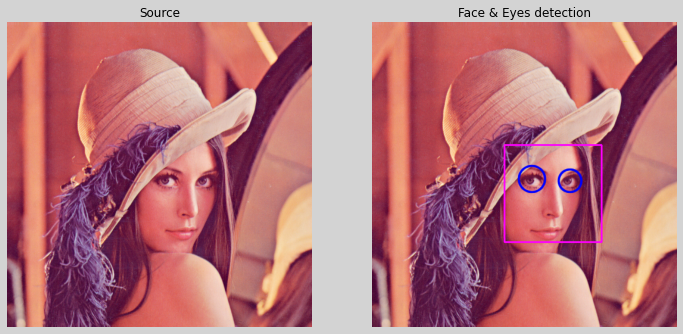

In [80]:
# pyplot으로 출력
plt.figure(figsize=(12, 6), facecolor="lightgray")

plt.subplot(121, title="Source").axis("off")
plt.imshow(source[..., ::-1])

plt.subplot(122, title="Face & Eyes detection").axis("off")
plt.imshow(destination[..., ::-1])

plt.show()

In [ ]:
# OpenCV 가상 윈도우로 출력
cv2.imshow("Source", source)
cv2.imshow("Face & Eyes detection", destination)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

## <font color = "#CC3D3D">Case #5: HOG(Histogram of Oriented Gradients)</font>

<hr>

### Step #1: Concept
<hr>

- HOG(Histogram of Oriented Gradients)
    - 2005년에 다랄(N. Dalal)과 트릭스(B. Triggs)가 발표한 HOG 알고리즘을 이용한 보행자 검출 방법이다.
    - HOG는 그래디언트 방향 히스토그램을 의미한다.
        - HOG는 "호그" 또는 "에이치-오-지"로 읽는다. 원문의 의미는 방향성이 있는 그래디언트의 히스토그램이지만,<br>
        실제 알고리즘은 그래디언트 방향 성분에 대한 히스토그램에 가깝다.
    - 다랄과 트릭스는 사람이 서 있는 영상에서 그래디언트를 구하고, 그래디언트의 크기와 방향 성분을 이용하여 사람이<br>
    서 있는 형태에 대한 특징 벡터를 정의하였다. 그리고 머신 러닝의 일종인 SVM 알고리즘을 이용하여 입력 영상에서<br>
    보행자 위치를 검출하는 방법을 제안했다.
        - SVM: Support Vector Machine.
        - 영상의 `지역적 그래디언트 방향 정보`를 특징 벡터로 사용했다.
    - HOG 알고리즘의 원리
        - 보행자 검출을 위한 HOG는 기본적으로 64 x 128 크기로 정규화된 영상에서 계산한다.
        - <img src="images/markdown/HOG_algorithm1.png" width="600">
        - HOG 알고리즘은 먼저 입력 영상으로부터 그래디언트를 계산한다.
        - 그래디언트는 크기와 방향 성분으로 계산하며, 방향 성분은 0˚부터 180˚까지로 설정한다.
        - 그다음은 입력 영상을 8 x 8 크기 단위로 분할하는데, 각각의 8 x 8 부분 영상을 셀(cell)이라고 부른다.
        - 64 x 128 영상에서 셀은 가로 방향으로 여덟 개, 세로 방향으로 16개 생성된다.
        - 각각의 셀로부터 그래디언트 방향 성분에 대한 히스토그램을 구하며, 이때 방향 성분은 20˚ 단위로 구분하면<br>
        총 아롭 개의 빈(bin)으로 구성된 방향 히스토그램이 만들어진다. 그리고 인접한 네 개의 셀을 합쳐서<br>
        블록(block)이라고 정의한다.
        - 블록 하나에서는 총 36개의 실수 값으로 이루저니 방향 히스토그램 정보가 추출된다.
        - 블록은 가로와 세로 방향으로 각각 한 개의 셀만큼 이동하면서 정의한다. 그러므로 64 x 128 영상에서<br>
        블록은 가로 방향으로 일곱 개, 세로 방향으로 15개 정의할 수 있다.
        - 최종적으로 64 x 128 영상에서 105개의 블록이 추출될 수 있고, 전체 블록에서 추출되는 방향 히스토그램<br>
        실수 값 개수는 105 x 36 = 3780이 된다. 이 3780개의 실수 값이 64 x 128 영상을 표현하는<br>
        HOG 특징 벡터 역할을 한다.
        - 아래 영상은 각 셀에서 계산된 그래디언트 방향 히스토그램을 비주얼하게 표현한 결과이다.
        - <img src="images/markdown/HOG_algorithm2.png" width="600">
        - <img src="images/markdown/HOG_algorithm3.png" width="600">
    - 다랄과 트릭스는 수천 장의 보행자 영상과 보행자가 아닌 영상에서 HOG 특징 벡터를 추출하였고,<br>
    이 두 특징 벡터를 구분하기 위해 SVM 알고리즘을 사용했다.
    - SVM은 두 개의 클래스를 효과적으로 분리하는 능력을 가진 머신 러닝 알고리즘이다.
        - SVM, 서포트 벡터 머신은 기본적으로 두 개의 클래스로 구성된 데이터를 `가장 여유 있게` 분리하는<br>
        `초평면(hyperplane)`을 찾는 머신 러닝 알고리즘이다. 초평면이란 두 클래스의 데이터를 분리하는<br>
        N차원 공간상의 평면을 의미한다.
    - 다랄과 트릭스는 수천 개의 보행자 특징 벡터와 보행자가 아닌 특징 벡터를 이용하여 SVM을 훈련시켰고,<br>
    효과적인 보행자 검출 방법을 완성시켰다.
    - HOG와 SVM을 이용한 객체 검출 기술은 이후 보행자 검출뿐만 아니라 다양한 형태의 객체 검출에서도 응용되었다.

<hr>

### Step #2: OpenCV function
<hr>

- OpenCV는 HOG 알고리즘을 구현한 HOGDescriptor 클래스를 제공한다. HOGDescriptor 클래스를 이용하면<br>
특정 객체의 HOG 기술자를 쉽게 구할 수 있다. 또한 HOGDescriptor 클래스는 보행자 검출을 위한 용도로 미리 계산된<br>
HOG 기술자 정보를 제공한다.

<hr>

> `HOG 기술자 객체 생성 및 보행자 검출을 위해 학습된 분류기 계수 불러오기`

$$\mathsf{{\color{RoyalBlue}cv2.HOGDescriptor}()\rightarrow \text{<CascadeClassifier object>}}$$

$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}HOGDescriptor\_getDefaultPeopleDetector}()\rightarrow retval}$$
- retval: 미리 훈련된 특징 벡터. 이는 똑바로 서 있는 사람을 검출하는 용도로 훈련된 분류기 계수를 반환한다.
    - type=`numpy.ndarray`
    - shape=`(3781, 1)`
    - dtype=`numpy.float32`
- `참고사항:`
    - 보행자 검출이 목적이라면 HOGDescriptor 클래스의 기본 생성자를 이용하여 객체를 생성하면 된다.
    - HOGDescriptor 클래스의 기본 생성자는 검색 윈도우 크기를 64 x 128로 설정하고, 셀 크기는 8 x 8,<br>
    블록 크기는 16 x 16, 그래디언트 방향 히스토그램 빈 개수는 9로 설정한다. 그러므로 생성자에 의해 만들어지는<br>
    HOG 기술자 하나는 3780개의 float 실수로 구성된다.

<hr>

> `SVM 분류기 계수 등록하기`

$$\mathsf{{\color{RoyalBlue}cv2.HOGDescriptor}{\color{Tan}.setSVMDetector}(svmdetector)\rightarrow None}$$
- svmdetector: 선형 SVM 분류기를 위한 계수
- `참고사항:`
    - HOGDescriptor 클래스를 이용하여 원하는 객체를 검출하려면 먼저 검출할 객체에 대해 훈련된 SVM 분류기 계수를<br>
    cv2.HOGDescriptor.setSVMDetector() 함수에 등록해야 한다.
    - 보행자 검출이 목적이라면 cv2.HOGDescriptor_getDefaultPeopleDetector() 함수가 반환한 분류기 계수를<br>
    cv2.HOGDescriptor.setSVMDetector() 함수 인자로 전달하면 된다.

<hr>

- HOG 기술자를 이용하여 실제 입력 영상에서 객체 영역을 검출하려면 cv2.HOGDescriptor.detectMultiScale()<br>
함수를 사용한다.

> `HOG 멀티스케일 객체 검출 함수`

$$\mathsf{{\color{RoyalBlue}cv2.HOGDescriptor}{\color{Tan}.detectMultiScale}(img, hitThreshold, winStride, padding, scale, finalThreshold, useMeanshiftGrouping)\rightarrow foundLocations, foundWeights}$$
- img: image. 입력 영상
- hitThreshold: 특징 벡터와 SVM 분류 평면까지의 거리에 대한 임계값
- winStride: window stride. 셀 윈도우 이동 크기
- padding: 패딩 크기
- scale: 검색 윈도우 크기 확대 비율
- finalThreshold: 검출 결정을 위한 임계값
- useMeanshiftGrouping: 겹쳐진 검색 윈도우를 합치는 방법 지정 플래그
- foundLocations: (출력) 검출된 사각형 영역 정보
- foundWeights: (출력) 검출된 사각형 영역에 대한 신뢰도
- `참고사항:`
    - image: cv2.CV_8UC1 or cv2.CV_8UC3 depth의 입력 영상 행렬을 지정한다.
    - winStride: (0, 0) 지정 시 셀 크기와 같게 설정된다.
    - scale: `기본값은 1.05`
    - foundLocations: 검출된 사각형의 (x, y, w, h)정보를 반환한다.

In [ ]:
import cv2
help(cv2.HOGDescriptor)

In [ ]:
import cv2
help(cv2.HOGDescriptor_getDefaultPeopleDetector)

In [ ]:
import cv2
help(cv2.HOGDescriptor.setSVMDetector)

In [ ]:
import cv2
help(cv2.HOGDescriptor.detectMultiScale)

<hr>

### Step #3: Implementation example
<hr>

In [90]:
# HOG pedestrian detection example
import cv2
import random

capture = cv2.VideoCapture("videos/vtest.avi")

if not capture.isOpened():
    print("Video open failed!")

FPS = capture.get(cv2.CAP_PROP_FPS)
DELAY = int(1000 / FPS)

HOG = cv2.HOGDescriptor()
HOG.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

while True:
    whether, frame = capture.read()
    
    if not whether:
        break
    
    detected, _ = HOG.detectMultiScale(frame)
    
    for (x, y, w, h) in detected:
        color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        cv2.rectangle(frame, (x, y, w, h), color, 2)
    
    cv2.imshow("frame", frame)
    if cv2.waitKey(DELAY) == 27:
        break

capture.release()
cv2.destroyAllWindows()
cv2.waitKey(1)


-1

## <font color = "#CC3D3D">Training #1: Narrow snow app</font>
<hr>

- 개요
    - 카메라 입력 영상에서 얼굴을 검출하여 재미있는 그래픽을 합성하는 프로그램
    - example: <img src="images/markdown/snow_app1.png" width="600">

<hr>

- 구현할 기능
    - 시스템 기본 카메라 입력 영상에서 얼굴 & 눈 검출하기
    - 얼굴 & 눈 검출
        - 캐스케이드 분류기 사용
            - XML 파일 다운로드: [https://github.com/opencv/opencv/tree/master/data/haarcascades](https://github.com/opencv/opencv/tree/master/data/haarcascades)
            - 얼굴 검출 XML 파일: haarcascade_frontalface_alt2.xml
            - 눈 검출 XML 파일: haarcascade_eye.xml
        - 눈 검출하기
            - 얼굴 검출 영역 내에서만 눈 검출
            - 눈이 두 개 검출되었을 경우에만 그래픽 합성
            - 왼쪽 눈과 오른쪽 눈 좌표를 계산하여 합성 시 사용
    - 눈 위치와 맞게 투명한 PNG 파일 합성하기
        - 사용할 PNG 파일: `glasses.png`
        - PNG 영상 크기 조절 및 위치 계산
            - 입력 영상에서 두 눈사이의 거리에 맞게 PNG 안경 영상 크기를 Resize
            - 왼쪽 눈 위치가 일치하도록 PNG 영상의 합성 위치를 계산
        - 합성 방식
            - Alpha 채널 값이 255면 완전한 불투명, 0이면 완전한 투명, 중간값이면 가중합 연산
            - <img src="images/markdown/snow_app2.png" width="600">
    - 합성된 결과를 동영상으로 저장하기

In [129]:
# Training: Narrow snow app
import cv2
import numpy as np


def overlay(image, glasses, position):
    sx = position[0]
    ex = position[0] + glasses.shape[1]
    sy = position[1]
    ey = position[1] + glasses.shape[0]
    
    if sx < 0 or sy < 0 or ex > image.shape[1] or ey > image.shape[0]:
        return
    
    image1 = image[sy:ey, sx:ex]
    image2 = glasses[:, :, :3]
    alpha = 1. - (glasses[:, :, 3] / 255.)
    
    image1[..., 0] = (image1[..., 0] * alpha + image2[..., 0] * (1 - alpha)).astype(np.uint8)
    image1[..., 1] = (image1[..., 1] * alpha + image2[..., 1] * (1 - alpha)).astype(np.uint8)
    image1[..., 2] = (image1[..., 2] * alpha + image2[..., 2] * (1 - alpha)).astype(np.uint8)


capture = cv2.VideoCapture(0)

if not capture.isOpened():
    print("Camera open failed!")

WIDTH = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
HEIGHT = int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))

FPS = round(capture.get(cv2.CAP_PROP_FPS))
DELAY = int(1000 / FPS)

FOURCC = cv2.VideoWriter_fourcc(*"mp4v")
frame_box = cv2.VideoWriter("videos/snow_app.mp4", FOURCC, 30, (WIDTH, HEIGHT))

face_classifier = cv2.CascadeClassifier("supports/haarcascade_frontalface_alt2.xml")
eyes_classifier = cv2.CascadeClassifier("supports/haarcascade_eye.xml")

if face_classifier.empty() or eyes_classifier.empty():
    print("XML load failed!")

glasses = cv2.imread("images/glasses.png", cv2.IMREAD_UNCHANGED)

if glasses is None:
    print("Image load failed!")

ew, eh = glasses.shape[:2]  # 가로, 세로 크기
ex1, ey1 = 240, 300  # 왼쪽 눈 좌표
ex2, ey2 = 660, 300  # 오른쪽 눈 좌표

while True:
    whether, frame = capture.read()
    
    if not whether:
        break
    
    faces = face_classifier.detectMultiScale(frame, scaleFactor=1.2, minSize=(100, 100), maxSize=(400, 400))
    
    for (x, y, w, h) in faces:
        face_region = frame[y:y+h // 2, x:x+w]
        eyes = eyes_classifier.detectMultiScale(face_region)
        
        if len(eyes) != 2:
            continue
        
        x1 = x + eyes[0][0] + (eyes[0][2] // 2)
        y1 = y + eyes[0][1] + (eyes[0][3] // 2)
        x2 = x + eyes[1][0] + (eyes[1][2] // 2)
        y2 = x + eyes[1][1] + (eyes[1][3] // 2)
        
        if x1 > x2:
            x1, y1, x2, y2 = x2, y2, x1, y1
        
        fx = (x2-x1) / (ex2-ex1)
        glasses2 = cv2.resize(glasses, (0, 0), None, fx, fx, cv2.INTER_AREA)
        
        position = (x1 - int(ex1 * fx), y1 - int(ey1 * fx))
        
        overlay(frame, glasses2, position)
        
    frame_box.write(frame)
    cv2.imshow('frame', frame)

    if cv2.waitKey(DELAY) == 27:
        break

capture.release()
frame_box.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1